In [1]:
from datetime import datetime, timedelta
from os import listdir
from os.path import isfile, join, isdir
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def processing_total_BS_num_df(total_bs_num_df):
    total_bs_num_df['Dates'] = pd.to_datetime(total_bs_num_df['Dates'], format= '%Y%m%d')          #converting the string to datetime format
    total_bs_num_df = total_bs_num_df.drop_duplicates(keep='first')                                #In case the num station file has multiple repeated rows. This can emerge if u delete a few pre-processed files (without deleting the corresponding rows in the NUM_STATIONS file) and then run the pre-processing code
    total_bs_num_df = total_bs_num_df.sort_values('Dates')
    
    return total_bs_num_df

In [3]:
def BS_per_OPR_time_series(all_df, total_bs_num_main_opr, total_bs_num_ORANGE, total_bs_num_SFR, total_bs_num_BT, total_bs_num_FREE):
    total_bs_num_main_opr.append(all_df['BS_ID'].nunique())
    num_bs_per_opr = all_df[['BS_ID', 'OPR_NAME']].drop_duplicates(keep='first')['OPR_NAME'].value_counts()
    total_bs_num_SFR.append(num_bs_per_opr['SFR'])
    total_bs_num_ORANGE.append(num_bs_per_opr['ORANGE'])
    total_bs_num_BT.append(num_bs_per_opr['BOUYGUES TELECOM'])
    total_bs_num_FREE.append(num_bs_per_opr['FREE MOBILE'])
    return

In [4]:
def BS_per_TECH_time_series(all_df, total_bs_num_2G, total_bs_num_3G, total_bs_num_4G, total_bs_num_5G, total_bs_num_2G_3G, total_bs_num_2G_3G_4G, total_bs_num_2G_3G_4G_5G, total_bs_num_3G_4G, total_bs_num_3G_4G_5G, total_bs_num_4G_5G,total_bs_num_2G_4G, total_bs_num_2G_5G, total_bs_num_2G_4G_5G, total_bs_num_2G_3G_5G, total_bs_num_3G_5G):
    temp_df = all_df[['BS_ID', 'System']].drop_duplicates(keep='first')
    temp_df['System'] = temp_df['System'].str.split(' ').str[0]
    temp_df = temp_df.drop_duplicates(keep='first')
    groups = temp_df.groupby('BS_ID')['System'].apply(list)

    c_2G = 0            #C stands for counter
    c_3G = 0
    c_4G = 0
    c_5G = 0
    c_2G_3G = 0
    c_2G_3G_4G = 0
    c_2G_3G_4G_5G = 0
    c_3G_4G = 0
    c_3G_4G_5G = 0
    c_4G_5G = 0
    
    c_2G_4G = 0
    c_2G_5G = 0
    c_2G_4G_5G = 0
    c_2G_3G_5G = 0
    c_3G_5G = 0
    
    for systems in groups:
        if set(systems) == set(['GSM']):
            c_2G += 1
        elif set(systems) == set(['UMTS']):
            c_3G += 1
        elif set(systems) == set(['LTE']):
            c_4G += 1
        elif set(systems) == set(['5G']):
            c_5G += 1
        elif set(systems) == set(['GSM', 'UMTS']):
            c_2G_3G += 1
        elif set(systems) == set(['GSM', 'UMTS', 'LTE']):
            c_2G_3G_4G += 1
        elif set(systems) == set(['GSM', 'UMTS', 'LTE', '5G']):
            c_2G_3G_4G_5G += 1
        elif set(systems) == set(['UMTS', 'LTE']):
            c_3G_4G += 1
        elif set(systems) == set(['UMTS', 'LTE', '5G']):
            c_3G_4G_5G += 1
        elif set(systems) == set(['LTE', '5G']):
            c_4G_5G += 1
        elif set(systems) == set(['GSM', 'LTE']):
            c_2G_4G += 1
        elif set(systems) == set(['GSM', '5G']):
            c_2G_5G += 1
        elif set(systems) == set(['GSM', 'LTE', '5G']):
            c_2G_4G_5G += 1
        elif set(systems) == set(['GSM', 'UMTS', '5G']):
            c_2G_3G_5G += 1
        elif set(systems) == set(['UMTS', '5G']):
            c_3G_5G += 1

    total_bs_num_2G.append(c_2G)
    total_bs_num_3G.append(c_3G)
    total_bs_num_4G.append(c_4G)
    total_bs_num_5G.append(c_5G)
    total_bs_num_2G_3G.append(c_2G_3G)
    total_bs_num_2G_3G_4G.append(c_2G_3G_4G)
    total_bs_num_2G_3G_4G_5G.append(c_2G_3G_4G_5G)
    total_bs_num_3G_4G.append(c_3G_4G)
    total_bs_num_3G_4G_5G.append(c_3G_4G_5G)
    total_bs_num_4G_5G.append(c_4G_5G)
    total_bs_num_2G_4G.append(c_2G_4G)
    total_bs_num_2G_5G.append(c_2G_5G)
    total_bs_num_2G_4G_5G.append(c_2G_4G_5G)
    total_bs_num_2G_3G_5G.append(c_2G_3G_5G)
    total_bs_num_3G_5G.append(c_3G_5G)
    return

In [5]:
def TRX_per_TECH_time_series(all_df, total_trx_num, trx_num_2G, trx_num_3G, trx_num_4G, trx_num_5G):
    temp_df = all_df[['TRX_ID', 'System']].drop_duplicates(keep='first')      #Drop actually does nothing here as there are no duplicates but for some reason it stops the warning which would otherwise have come after the next line of code
    total_trx_num.append(temp_df['TRX_ID'].nunique())       #We can also just take the len as the number of lines in the df is equal to the number of transceivers

    temp_df['System'] = temp_df['System'].str.split(' ').str[0]
    groups = temp_df.groupby('System')['TRX_ID'].count()

    trx_num_2G.append(groups['GSM'])
    trx_num_3G.append(groups['UMTS'])
    trx_num_4G.append(groups['LTE'])

    if ('5G' in groups.keys()):
        trx_num_5G.append(groups['5G'])
    else:
        trx_num_5G.append(0)
    return

In [6]:
def plot_BS_per_TECH_time_series(dates, total_bs_num_main_opr, total_bs_num_2G, total_bs_num_3G, total_bs_num_4G, total_bs_num_5G, total_bs_num_2G_3G, total_bs_num_2G_3G_4G, total_bs_num_2G_3G_4G_5G, total_bs_num_3G_4G, total_bs_num_3G_4G_5G, total_bs_num_4G_5G,total_bs_num_2G_4G, total_bs_num_2G_5G, total_bs_num_2G_4G_5G, total_bs_num_2G_3G_5G, total_bs_num_3G_5G):
    plt.plot(dates, total_bs_num_main_opr, color='purple', label='All Generations', linewidth=5)

    plt.plot(dates, total_bs_num_2G, color='green', label='2G', linewidth=5)

    plt.plot(dates, total_bs_num_3G, color='orange', label='3G', linewidth=5)

    plt.plot(dates, total_bs_num_2G_3G, color='yellow', label='2G/3G', linewidth=5)

    plt.plot(dates, total_bs_num_2G_3G_4G, color='pink', label='2G/3G/4G', linewidth=5)

    plt.plot(dates, total_bs_num_2G_3G_4G_5G, color='brown', label='2G/3G/4G/5G', linewidth=5)

    plt.plot(dates, total_bs_num_3G_4G, color='black', label='3G/4G', linewidth=5)

    plt.plot(dates, total_bs_num_3G_4G_5G, color='cyan', label='3G/4G/5G', linewidth=5)
    
    plt.axvline(x = datetime(2020, 12, 1), color = 'b', linestyle='dashed')

    plt.legend(fontsize=21)
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)

    plt.ylabel("Number of In Service BSs", fontsize=24)

    plt.ylim(ymin = 0)
    # Save Image
    plt.savefig('./Graphs/BSs_by_Technology.pdf')
    # Show graphic
    plt.show()
    
    return

In [7]:
def plot_TRX_per_TECH_time_series(dates, total_trx_num, trx_num_2G, trx_num_3G, trx_num_4G, trx_num_5G):
    plt.plot(dates, total_trx_num, color='purple', label='All Generations', linewidth=5)

    plt.plot(dates, trx_num_2G, color='green', label='2G', linewidth=5)

    plt.plot(dates, trx_num_3G, color='orange', label='3G', linewidth=5)

    plt.plot(dates, trx_num_4G, color='red', label='4G', linewidth=5)

    plt.plot(dates, trx_num_5G, color='blue', label='5G', linewidth=5)
    
    plt.axvline(x = datetime(2020, 12, 1), color = 'b', linestyle='dashed')

    plt.legend(fontsize=21)
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)

    plt.ylabel("Number of Transceivers", fontsize=24)

    plt.ylim(ymin = 0)
    # Save Image
    plt.savefig('./Graphs/TRX_by_Technology.pdf')
    # Show graphic
    plt.show()
    
    return

In [8]:
def BS_CGR(dates, total_bs_num_main_opr):
    final_val = total_bs_num_main_opr[len(total_bs_num_main_opr) - 1]
    
    initial_val = total_bs_num_main_opr[0]
    time_months = len(dates) - 1                    #minus 1 because the first date is the starting point
    time_years = time_months / 12
    
    cagr = ((final_val/initial_val)**(1/time_years)) - 1
    print ('BS CAGR:', cagr)
    
    #After 5G
    start_date_5G_index = dates.index(datetime(2020, 10, 30))
    initial_val_5G = total_bs_num_main_opr[start_date_5G_index]
    
    time_months = (len(dates) - start_date_5G_index) - 1                    #minus 1 because the first date is the starting point
    time_years = time_months / 12
    
    cagr_5G = ((final_val/initial_val_5G)**(1/time_years)) - 1
    print ('BS CAGR after 5G:', cagr_5G)
    
    return

In [9]:
def TRX_CGR(dates, total_trx_num):   
    final_val = total_trx_num[len(total_trx_num) - 1]
    
    initial_val = total_trx_num[0]
    time_months = len(dates) - 1                    #minus 1 because the first date is the starting point
    time_years = time_months / 12
    cagr = ((final_val/initial_val)**(1/time_years)) - 1
    print ('TRX CAGR:', cagr)
    
    #After 5G
    final_val = total_trx_num[len(total_trx_num) - 1]                         #Checking
    
    start_date_5G_index = dates.index(datetime(2020, 10, 30))    
    initial_val_5G = total_trx_num[start_date_5G_index]
    
    time_months = ((len(dates)) - start_date_5G_index) - 1                    #minus 1 because the first date is the starting point
    time_years = time_months / 12
    
    cagr_5G = ((final_val/initial_val_5G)**(1/time_years)) - 1
    print ('TRX CAGR after 5G:', cagr_5G)
    
    return

------------------------ALL Pre-Processed Files------------------------
['20150401.txt', '20150501.txt', '20150602.txt', '20150701.txt', '20150801.txt', '20150829.txt', '20150926.txt', '20151031.txt', '20151128.txt', '20160109.txt', '20160130.txt', '20160227.txt', '20160402.txt', '20160430.txt', '20160528.txt', '20160630.txt', '20160730.txt', '20160827.txt', '20160930.txt', '20161028.txt', '20161126.txt', '20161224.txt', '20170128.txt', '20170225.txt', '20170401.txt', '20170429.txt', '20170531.txt', '20170701.txt', '20170729.txt', '20170831.txt', '20171005.txt', '20171031.txt', '20171130.txt', '20171222.txt', '20180131.txt', '20180228.txt', '20180330.txt', '20180427.txt', '20180531.txt', '20180629.txt', '20180801.txt', '20180831.txt', '20180930.txt', '20181031.txt', '20181130.txt', '20181231.txt', '20190131.txt', '20190228.txt', '20190331.txt', '20190430.txt', '20190529.txt', '20190628.txt', '20190801.txt', '20190830.txt', '20191001.txt', '20191031.txt', '20191129.txt', '20200101.txt',

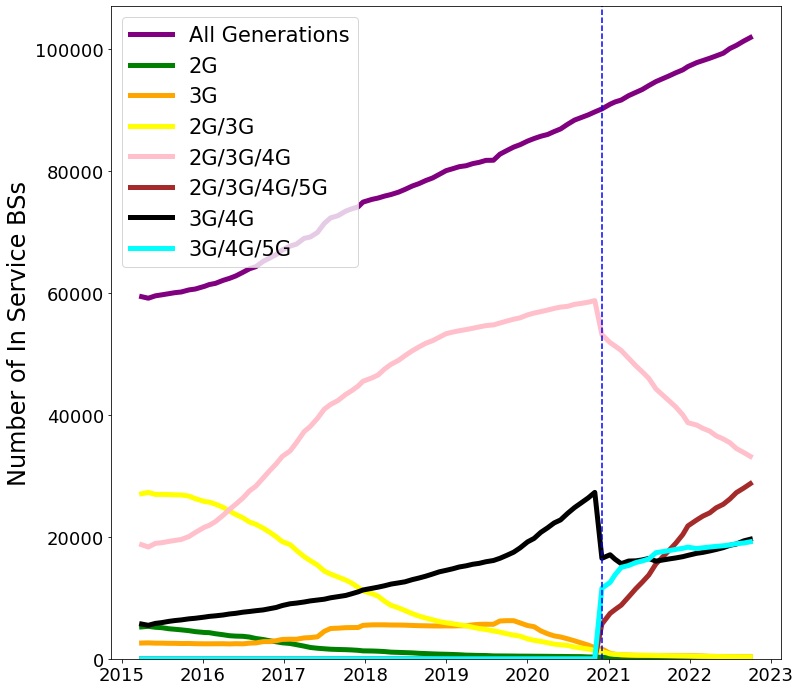

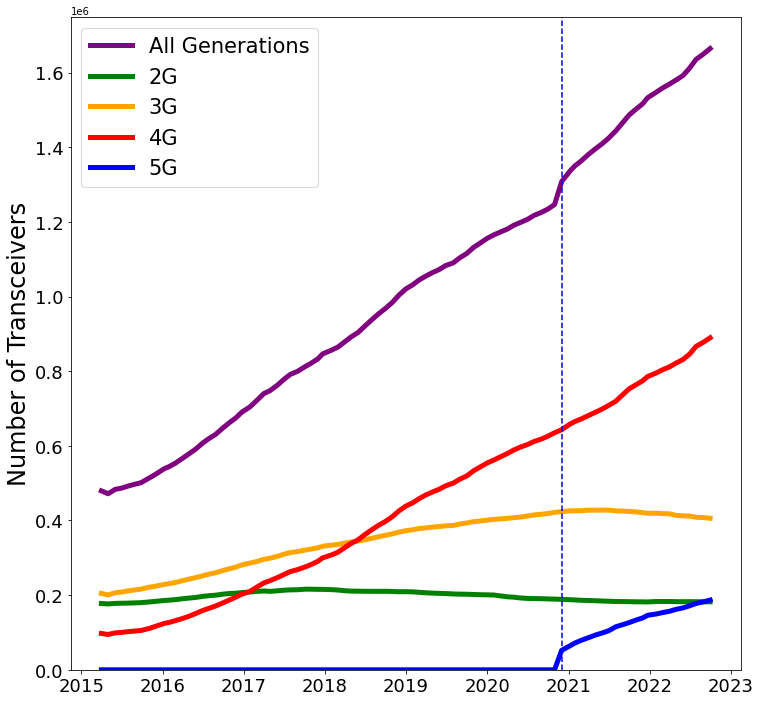

---------------TRX NUM TOTAL-----------------
[479394, 471605, 483374, 486712, 492585, 497081, 501197, 513116, 522784, 538824, 544176, 553175, 567421, 578924, 590812, 607459, 620303, 630783, 648544, 662048, 675028, 690809, 704098, 719821, 740056, 748039, 762081, 778501, 791363, 799738, 812751, 821458, 833021, 846528, 856544, 864507, 878267, 891077, 904253, 920581, 938533, 954137, 968088, 984282, 1003779, 1020505, 1031496, 1044178, 1054919, 1064245, 1072065, 1082980, 1090194, 1103539, 1115311, 1131378, 1142709, 1155988, 1165330, 1173079, 1180850, 1191086, 1198386, 1206760, 1217785, 1225254, 1234432, 1246318, 1307979, 1335808, 1349835, 1362851, 1380499, 1396338, 1408856, 1424236, 1443360, 1485998, 1500877, 1516187, 1532702, 1547676, 1558642, 1569126, 1579772, 1592093, 1612234, 1635523, 1649790, 1664445]
---------------Compound Growth Rate-----------------
BS CAGR: 0.0754954747898744
BS CAGR after 5G: 0.07202536406191618
TRX CAGR: 0.1827331429390624
TRX CAGR after 5G: 0.17093079056265603


In [10]:
encoding_type = 'latin1'
pre_processed_dir = './Pre-processed data'

processed_files = [file for file in listdir(pre_processed_dir) if (isfile(join(pre_processed_dir, file))) and (file != 'NUM_STATIONS.txt')]

processed_files.sort()         #Will sort according to the date just in case it is not already sorted

print("------------------------ALL Pre-Processed Files------------------------")
print(processed_files)
print("-----------------------------------------------------------------------")

#-------------------------------------------------------------------------------------------#

total_bs_num_df = pd.read_csv(join(pre_processed_dir, 'NUM_STATIONS.txt'), sep = ';', encoding = encoding_type)         #Including those from the other operators
total_bs_num_df = processing_total_BS_num_df(total_bs_num_df)

total_bs_num = total_bs_num_df['Total_NUM_BSs'].tolist()


plt.rcParams["figure.figsize"] = (12,12)

dates = []

total_bs_num_main_opr = []
total_bs_num_SFR = []
total_bs_num_ORANGE = []
total_bs_num_BT = []
total_bs_num_FREE = []

#----Single type BSs only - Determined based on transceivers present on the base station----#
total_bs_num_2G = []
total_bs_num_3G = []
total_bs_num_4G = []
total_bs_num_5G = []
#----BSs running multiple technologies----#
total_bs_num_2G_3G = []
total_bs_num_2G_3G_4G = []
total_bs_num_2G_3G_4G_5G = []
total_bs_num_3G_4G = []
total_bs_num_3G_4G_5G = []
total_bs_num_4G_5G = []

total_bs_num_2G_4G = []
total_bs_num_2G_5G = []
total_bs_num_2G_4G_5G = []
total_bs_num_2G_3G_5G = []
total_bs_num_3G_5G = []

total_trx_num = []
trx_num_2G = []
trx_num_3G = []
trx_num_4G = []
trx_num_5G = []


print("----------------------Generating Time Series Graphs----------------------")
for file in processed_files:
    date = file.split('.')[0]
    dates.append(datetime.strptime(date, '%Y%m%d'))

    all_df = pd.read_csv(join(pre_processed_dir, file), sep = ';', dtype=str, encoding = encoding_type)

    BS_per_OPR_time_series(all_df, total_bs_num_main_opr, total_bs_num_ORANGE, total_bs_num_SFR, total_bs_num_BT, total_bs_num_FREE)
    BS_per_TECH_time_series(all_df, total_bs_num_2G, total_bs_num_3G, total_bs_num_4G, total_bs_num_5G, total_bs_num_2G_3G, total_bs_num_2G_3G_4G, total_bs_num_2G_3G_4G_5G, total_bs_num_3G_4G, total_bs_num_3G_4G_5G, total_bs_num_4G_5G, total_bs_num_2G_4G, total_bs_num_2G_5G, total_bs_num_2G_4G_5G, total_bs_num_2G_3G_5G, total_bs_num_3G_5G)
    TRX_per_TECH_time_series(all_df, total_trx_num, trx_num_2G, trx_num_3G, trx_num_4G, trx_num_5G)

    print('------------Currently Processing------------')
    print(file)

#-----------------Time Series Graph Showing BSs per Technology-----------------# 
plot_BS_per_TECH_time_series(dates, total_bs_num_main_opr, total_bs_num_2G, total_bs_num_3G, total_bs_num_4G, total_bs_num_5G, total_bs_num_2G_3G, total_bs_num_2G_3G_4G, total_bs_num_2G_3G_4G_5G, total_bs_num_3G_4G, total_bs_num_3G_4G_5G, total_bs_num_4G_5G, total_bs_num_2G_4G, total_bs_num_2G_5G, total_bs_num_2G_4G_5G, total_bs_num_2G_3G_5G, total_bs_num_3G_5G)
#-----------------Time Series Graph Showing TRX per Technology-----------------# 
plot_TRX_per_TECH_time_series(dates, total_trx_num, trx_num_2G, trx_num_3G, trx_num_4G, trx_num_5G)

print("---------------TRX NUM TOTAL-----------------")
print(total_trx_num)
print("---------------Compound Growth Rate-----------------")
BS_CGR(dates, total_bs_num_main_opr)
TRX_CGR(dates, total_trx_num)